import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('nasdaq100.csv', sep=';')

In [17]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [19]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [21]:
df = df.drop(columns=['Date'])

In [23]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'NASDAQ100 STOCK PRICES')

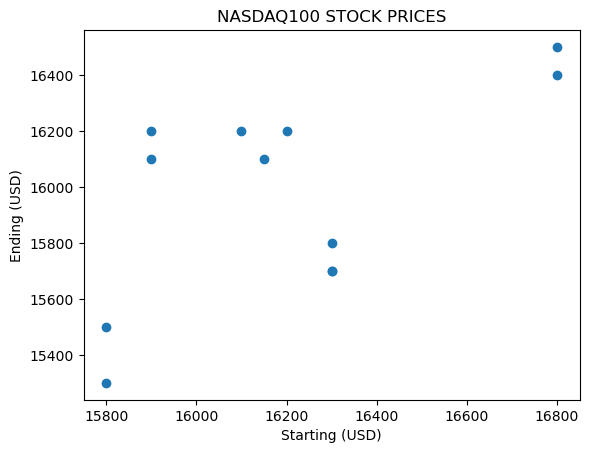

In [25]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 STOCK PRICES')

In [27]:
x = df.drop('Ending (USD)',axis=1)

In [29]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [31]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


# Linear Rigression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression()

In [35]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [36]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'NASDAQ100 STOCK PRICES')

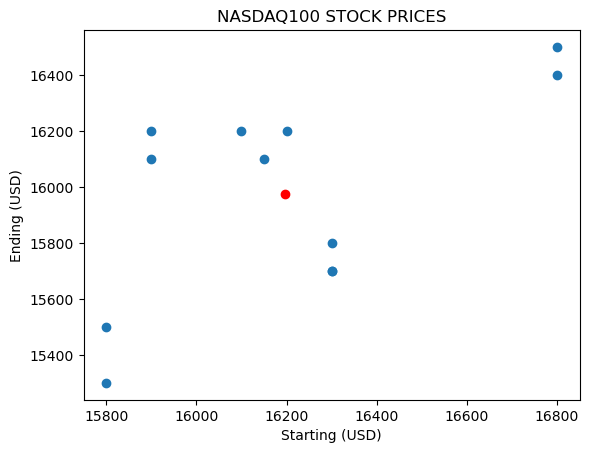

In [37]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 STOCK PRICES')

In [38]:
reg.fit(x,y)

LinearRegression()

In [45]:
m = reg.coef_
m

array([[0.65258293]])

In [47]:
c = reg.intercept_
c

array([5405.87555702])

In [49]:
y = m*16700 + c
y

array([[16304.0105628]])

In [51]:
# use predict function instead

In [53]:
reg.predict([[16700]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [76]:
df['predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NASDAQ100 STOCK PRICES')

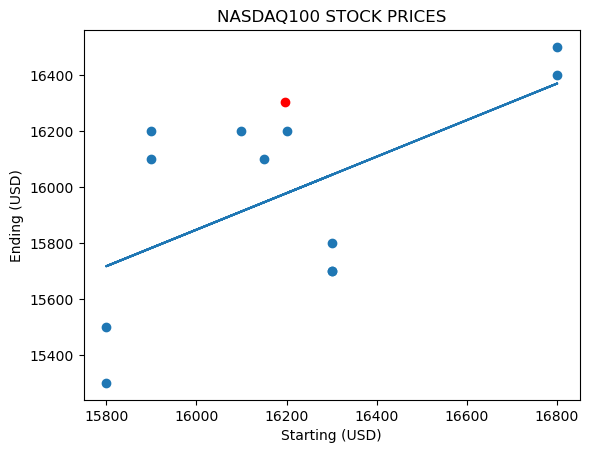

In [78]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 STOCK PRICES')

# Lost and Cost Function

In [81]:
df['loss'] = df['Ending (USD)'] - df['predicted_y']

In [83]:
df.head()

,Starting (USD),Ending (USD),predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [85]:
#MSE and #MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [91]:
mse = mean_squared_error(df['Ending (USD)'],df['predicted_y'])
mse

80411.23397700385

In [93]:
mae = mean_absolute_error(df['Ending (USD)'],df['predicted_y'])
mae

260.3840017604666

# R2 Squared Value / Accuracy for regression

In [23]:
# use r2_score(y,reg.predict(x))